# COVID-19 in the Nordics

This notebook investigates how the Nordic countries Finland, Sweden, Denmark, Iceland and Norway have been affected by COVID-19. Abbreviations in the plots are FIN: Finland, SWE: Sweden, DNK: Denmark, ISL: Iceland and NOR: Norway.

The data used is from our world data (https://ourworldindata.org/coronavirus/) downloaded on the 11th of December 2021. Data from Google trends (https://trends.google.se/trends/) were downloaded on the 12th of December 2021.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy.stats import pearsonr
from scipy.stats import linregress

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#import data
owid_covid_data = pd.read_csv("./data/2021-12-11_owid-covid-data.csv",
                   parse_dates=["date"])

nordics_df = owid_covid_data[owid_covid_data["iso_code"].isin(["SWE", 
                                                               "DNK",
                                                               "FIN",
                                                               "NOR",
                                                               "ISL"])]

nordics_df = nordics_df.sort_values(['date'] )

nordics_df["total_cases_per_pop"] = nordics_df["total_cases"] / nordics_df["population"]
nordics_df["total_deaths_per_pop"] = nordics_df["total_deaths"] / nordics_df["population"]

nordics_df["new_cases_per_pop"] = nordics_df["new_cases"] / nordics_df["population"]
nordics_df["new_deaths_per_pop"] = nordics_df["new_deaths"] / nordics_df["population"]

nordics_df["new_cases_7"] = nordics_df.groupby('iso_code')['new_cases'].transform(lambda x: x.rolling(7).mean())
nordics_df['new_cases_7_per_pop'] = nordics_df['new_cases_7'] / nordics_df["population"]

nordics_df["new_deaths_7"] = nordics_df.groupby('iso_code')['new_deaths'].transform(lambda x: x.rolling(7).mean())
nordics_df['new_deaths_7_per_pop'] = nordics_df['new_deaths_7'] / nordics_df["population"]

nordics_df["people_vaccinated_per_pop"] = nordics_df['people_vaccinated'] / nordics_df["population"]
nordics_df["people_fully_vaccinated_per_pop"] = nordics_df['people_fully_vaccinated'] / nordics_df["population"]

first_vaccinated_nordics = nordics_df[nordics_df["people_fully_vaccinated"] > 0]["date"].min()


In [7]:
#set plot colors, limits etc
plot_start_date = pd.to_datetime("2019-11-01")
plot_end_date = nordics_df["date"].max() + pd.DateOffset(10)
plot_colors =["lightskyblue", "gold", "crimson", "mediumslateblue", "maroon"]


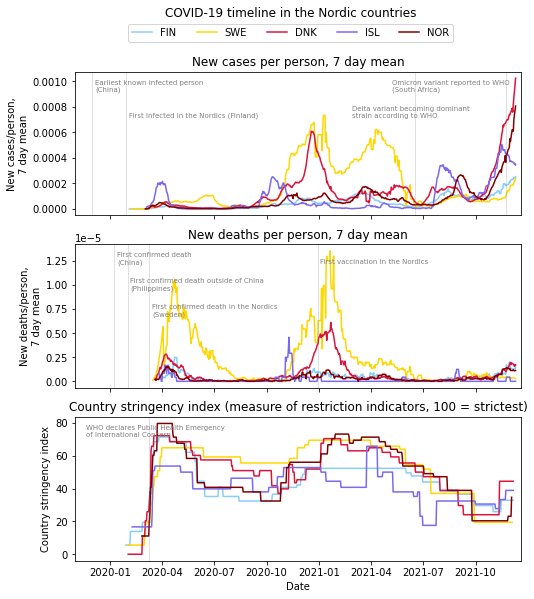

In [8]:
# Figure 1, timeline, new cases/deaths/stringency index
fig, axes = plt.subplots(nrows=3,
                         ncols=1, 
                         figsize=(8,9),
                         sharex=True)
axes[0].set(xlim = (plot_start_date,plot_end_date))
sns.lineplot(data=nordics_df, 
             x="date", 
             y="new_cases_7_per_pop", 
             hue="iso_code", ax = axes[0],
             palette=plot_colors)

sns.lineplot(data=nordics_df, 
             x="date", 
             y="new_deaths_7_per_pop", 
             hue="iso_code", ax = axes[1],
             palette=plot_colors)

sns.lineplot(data=nordics_df, 
             x="date", 
             y="stringency_index", 
             hue="iso_code", ax = axes[2],
             palette=plot_colors)

axes[0].set_title("New cases per person, 7 day mean")
axes[1].set_title("New deaths per person, 7 day mean")
axes[2].set_title("Country stringency index (measure of restriction indicators, 100 = strictest)")

axes[0].set(ylabel='New cases/person,\n7 day mean')
axes[1].set(ylabel='New deaths/person,\n7 day mean')
axes[2].set(ylabel='Country stringency index')
axes[2].set(xlabel='Date')

# Earliest known infected person
axes[0].text(x = pd.to_datetime("2019-12-01")+pd.DateOffset(5), 
 y = nordics_df["new_cases_7_per_pop"].max()-nordics_df["new_cases_7_per_pop"].max()*0.1, 
 s = "Earliest known infected person\n(China)", 
 color = "grey", 
 fontsize=7)
axes[0].axvline(pd.to_datetime("2019-12-01"), color= "grey", alpha = 0.5, linewidth=0.5)

# First infected in the Nordics (Finland)
axes[0].text(x = pd.to_datetime("2020-01-29")+pd.DateOffset(5), 
 y = nordics_df["new_cases_7_per_pop"].max()-nordics_df["new_cases_7_per_pop"].max()*0.3,
 s = "First infected in the Nordics (Finland)", # data label
 color = "grey", 
 fontsize=7)
axes[0].axvline(pd.to_datetime("2020-01-29"), color= "grey", alpha = 0.5, linewidth=0.5)

# omicron
axes[0].text(x = pd.to_datetime("2021-11-24")-pd.DateOffset(200),
 y = nordics_df["new_cases_7_per_pop"].max()-nordics_df["new_cases_7_per_pop"].max()*0.1,  
 s = "Omicron variant reported to WHO\n(South Africa)",
 color = "grey", 
 fontsize=7)
axes[0].axvline(pd.to_datetime("2021-11-24"), color= "grey", alpha = 0.5, linewidth=0.5)
  
# delta
axes[0].text(x = pd.to_datetime("2021-06-18")-pd.DateOffset(110),
 y = nordics_df["new_cases_7_per_pop"].max()-nordics_df["new_cases_7_per_pop"].max()*0.30, 
 s = "Delta variant becoming dominant\nstrain according to WHO", 
 color = "grey", 
 fontsize=7)
axes[0].axvline(pd.to_datetime("2021-06-18"), color= "grey", alpha = 0.5, linewidth=0.5)
    

# First confirmed death
axes[1].text(x = pd.to_datetime("2020-01-09")+pd.DateOffset(5), 
 y = nordics_df["new_deaths_7_per_pop"].max()-nordics_df["new_deaths_7_per_pop"].max()*0.1, 
 s = "First confirmed death\n(China)", 
 color = "grey", 
 fontsize=7)
axes[1].axvline(pd.to_datetime("2020-01-09"), color= "grey", alpha = 0.5, linewidth=0.5)
    
# First confirmed death outside of china 
axes[1].text(x = pd.to_datetime("2020-02-01")+pd.DateOffset(5),
 y = nordics_df["new_deaths_7_per_pop"].max()-nordics_df["new_deaths_7_per_pop"].max()*0.30,
 s = "First confirmed death outside of China\n(Philippines)",
 color = "grey", 
 fontsize=7)
axes[1].axvline(pd.to_datetime("2020-02-01"), color= "grey", alpha = 0.5, linewidth=0.5)

# First confirmed death in the Nordics (Sweden)
axes[1].text(x = pd.to_datetime("2020-03-10")+pd.DateOffset(5),
 y = nordics_df["new_deaths_7_per_pop"].max()-nordics_df["new_deaths_7_per_pop"].max()*0.50, 
 s = "First confirmed death in the Nordics\n(Sweden)", 
 color = "grey", 
 fontsize=7)
axes[1].axvline(pd.to_datetime("2020-03-10"), color= "grey", alpha = 0.5, linewidth=0.5)
    
#first vaccinated Nordics
axes[1].text(x = first_vaccinated_nordics+pd.DateOffset(5), 
 y = nordics_df["new_deaths_7_per_pop"].max()-nordics_df["new_deaths_7_per_pop"].max()*0.10, 
 s = "First vaccination in the Nordics",
 color = "grey", 
 fontsize=7)
axes[1].axvline(first_vaccinated_nordics, color= "grey", alpha = 0.5, linewidth=0.5)

#(WHO) declared a Public Health Emergency of International Concern
axes[2].text(x = pd.to_datetime("2020-03-10")-pd.DateOffset(110),
 y = nordics_df["stringency_index"].max()-nordics_df["stringency_index"].max()*0.10, 
 s = "WHO declares Public Health Emergency\nof International Concern", 
 color = "grey", 
 fontsize=7)
axes[2].axvline(pd.to_datetime("2020-03-10"), color= "grey", alpha = 0.5, linewidth=0.5)
  
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=5, bbox_to_anchor=(0.5, 0.94))

fig.suptitle('COVID-19 timeline in the Nordic countries')

plt.savefig('./output/fig_1.pdf')

## Figure 1. COVID-19 timeline of new cases, deaths and stringency index.

The seven day rolling mean of new cases and deaths as well as the country stringency index were plotted against time (Fig. 1). The country stringency index is a measure of nine indicators such as school/workplace closures and travel bans. Chosen key events are also plotted as vertical lines. 

It is shown that new corona cases per person were higher in Sweden compared to the other countries, especially in the beginning of 2020 and during spring 2021. New cases are rapidly increasing in winter 2021, especially in Denmark and Norway. This could possibly be due to the new Omicron variant.

Sweden seems to have the highest number of new deaths per person during the pandemic. The country stringency index are quite similar throughout the study, and is increasing a lot when WHO declared COVID-19 to be a Public Health Emergency of international concern.

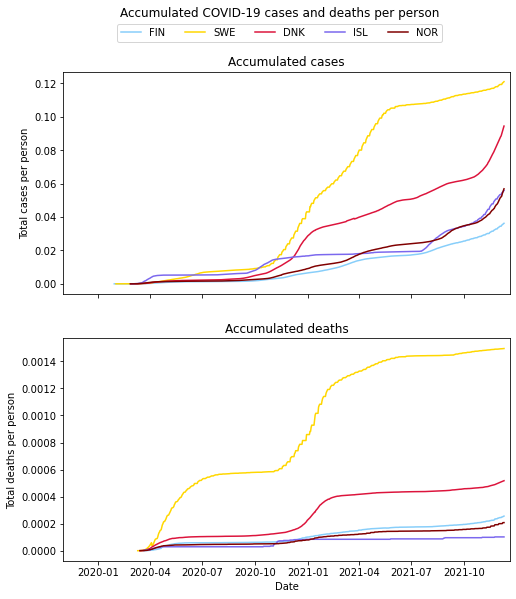

In [9]:
# Figure 2, accumulated cases/deaths
fig2, axes2 = plt.subplots(nrows=2,
                         ncols=1, 
                         figsize=(8,9),
                         sharex=True)
axes2[0].set(xlim = (plot_start_date,plot_end_date))
sns.lineplot(data=nordics_df, 
             x="date", 
             y="total_cases_per_pop", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes2[0])

sns.lineplot(data=nordics_df, 
             x="date", 
             y="total_deaths_per_pop", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes2[1])

axes2[0].set_title("Accumulated cases")
axes2[1].set_title("Accumulated deaths")
axes2[0].set(ylabel='Total cases per person')
axes2[1].set(ylabel='Total deaths per person')
axes2[1].set(xlabel='Date')

axes2[0].get_legend().remove()
axes2[1].get_legend().remove()

handles, labels = axes2[0].get_legend_handles_labels()
fig2.legend(handles, labels, loc='center', ncol=5, bbox_to_anchor=(0.5, 0.94))

fig2.suptitle('Accumulated COVID-19 cases and deaths per person')

plt.savefig('./output/fig_2.pdf')

## Figure 2. Accumulated cases and deaths per person in the Nordic countries.

The accumulated cases and deaths per person were investigated (Fig. 2). As shown in Fig. 1, it seems that Sweden took the hardest beating, both in terms of new cases and deaths per person

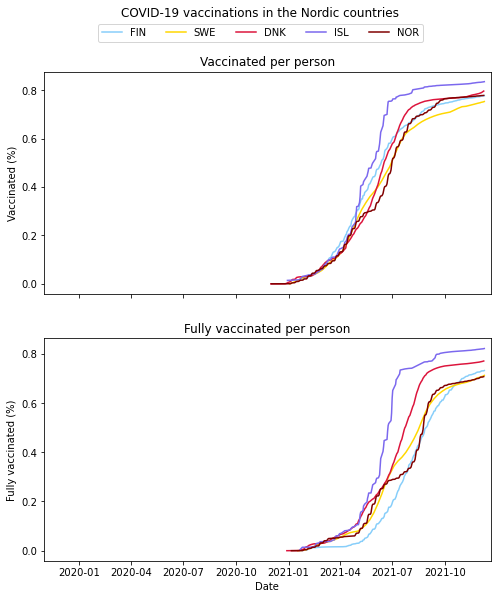

In [10]:
# Figure 3, vaccination

fig3, axes3 = plt.subplots(nrows=2,
                         ncols=1, 
                         figsize=(8,9),
                         sharex=True)
axes3[0].set(xlim = (plot_start_date,plot_end_date))
sns.lineplot(data=nordics_df, 
             x="date", 
             y="people_vaccinated_per_pop", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes3[0])

sns.lineplot(data=nordics_df, 
             x="date", 
             y="people_fully_vaccinated_per_pop", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes3[1])

axes3[0].set_title("Vaccinated per person")
axes3[1].set_title("Fully vaccinated per person")
axes3[0].set(ylabel='Vaccinated (%)')
axes3[1].set(ylabel='Fully vaccinated (%)')
axes3[1].set(xlabel='Date')

axes3[0].get_legend().remove()
axes3[1].get_legend().remove()

handles, labels = axes2[0].get_legend_handles_labels()
fig3.legend(handles, labels, loc='center', ncol=5, bbox_to_anchor=(0.5, 0.94))

fig3.suptitle('COVID-19 vaccinations in the Nordic countries')

plt.savefig('./output/fig_3.pdf')

## Figure 3. Vaccination rates in the Nordic countries

The vaccination rates were plotted against time (Fig. 3) and shows very similar patterns and rates. Iceland seems to have the highest vaccination percentage in the Nordic countries.

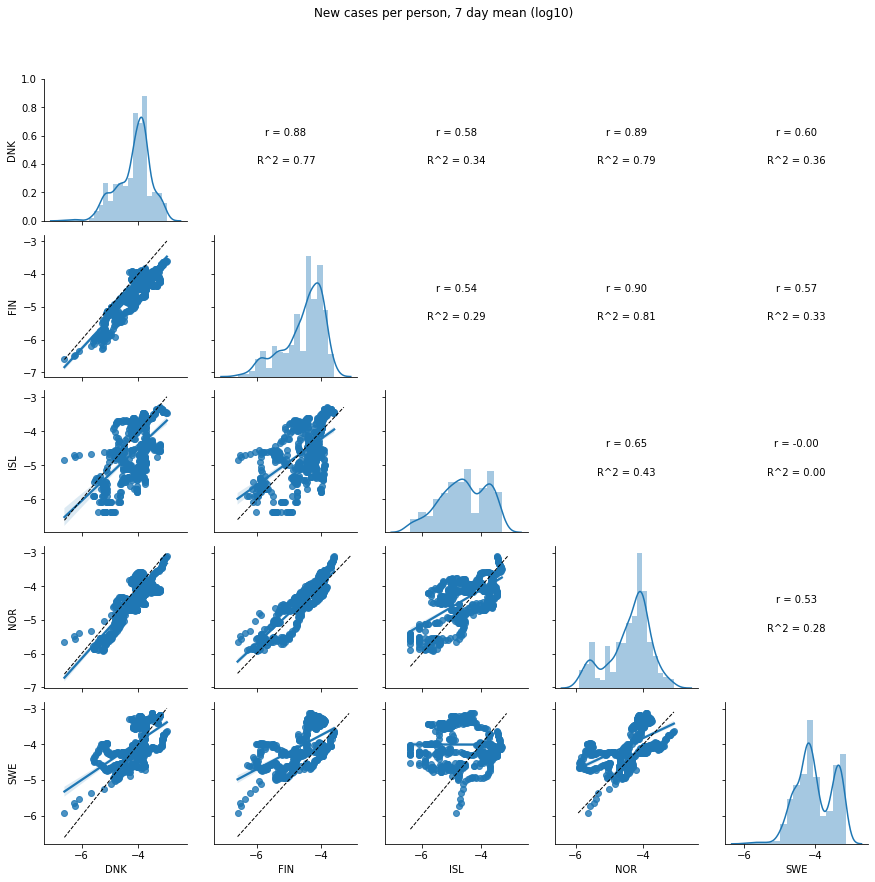

In [11]:
# Figure 4, correlation new cases 7 day mean
#inspiration from https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot
#https://seaborn.pydata.org/generated/seaborn.PairGrid.html
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.6), xycoords='axes fraction', ha='center')
    ax.annotate('R^2 = {:.2f}'.format(r**2), xy=(0.5,0.4), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

# inspiration from https://stackoverflow.com/questions/48122019/how-can-i-plot-identity-lines-on-a-seaborn-pairplot
def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

df_7_day_mean = nordics_df[["iso_code", "date", "new_cases_7_per_pop"]]
df_7_day_mean = df_7_day_mean.pivot(index = "date", columns = "iso_code", values = "new_cases_7_per_pop")
df_7_day_mean_dropped = df_7_day_mean.dropna()
#log10
df_7_day_mean_dropped_log = np.log10(df_7_day_mean_dropped)
df_7_day_mean_dropped_log.replace([np.inf, -np.inf], np.nan, inplace=True)
df_7_day_mean_dropped_log = df_7_day_mean_dropped_log.dropna()

g = sns.PairGrid(df_7_day_mean_dropped_log)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
g.map_lower(plot_unity)

g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('New cases per person, 7 day mean (log10)')
plt.savefig('./output/fig_4_log10.pdf')

## Figure 4. Correlations of the seven day rolling mean of new cases per person in log10. Linear regressions are shown in blue and a 1:1 regression is shown as black dotted line. The coefficient of determination are shown in the top half of the plot, indicating how well the line fits the data.

Correlations of the seven day rolling mean of new cases per person was investigated using the log10 of the data since this made it much more normally distributed. The same date in each pair of countries were plotted as one dot. It is shown that the new cases per person in Finland, Norway and Denmark correlate quite well, whereas Sweden and Iceland are not correlating as well to the other countries.

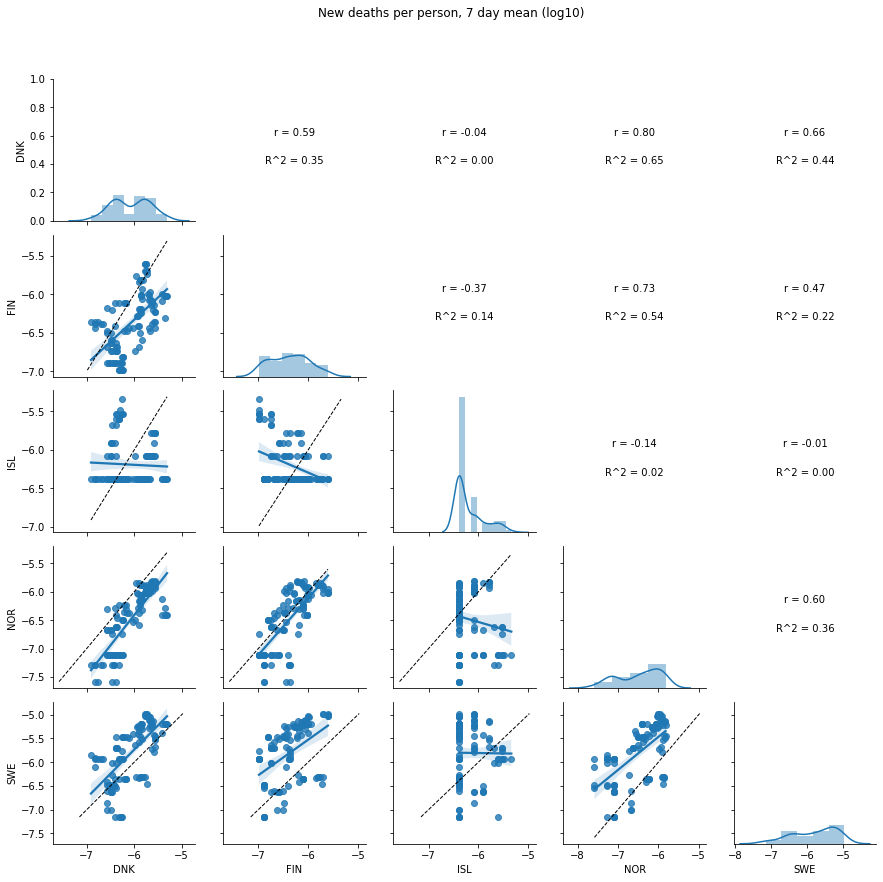

In [12]:
# Figure 5, correlation new deaths 7 day mean

df_deaths_7_day_mean = nordics_df[["iso_code", "date", "new_deaths_7_per_pop"]]
df_deaths_7_day_mean = df_deaths_7_day_mean.pivot(index = "date", columns = "iso_code", values = "new_deaths_7_per_pop")
df_deaths_7_day_mean_dropped = df_deaths_7_day_mean.dropna()

#log10
df_deaths_7_day_mean_dropped_log = np.log10(df_deaths_7_day_mean_dropped)
df_deaths_7_day_mean_dropped_log.replace([np.inf, -np.inf], np.nan, inplace=True)
df_deaths_7_day_mean_dropped_log = df_deaths_7_day_mean_dropped_log.dropna()

g = sns.PairGrid(df_deaths_7_day_mean_dropped_log)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
g.map_lower(plot_unity)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('New deaths per person, 7 day mean (log10)')
plt.savefig('./output/fig_5_log10.pdf')


## Figure 5. Correlations of the seven day rolling mean of new deaths per person in log10. Linear regressions are shown in blue and a 1:1 regression is shown as black dotted line. The coefficient of determination are shown in the top half of the plot, indicating how well the line fits the data

The correlations of seven day rolling mean of new deaths per person were plotted in Fig. 5. Sweden seems to correlate well with all countries except for Iceland. However, just like it was shown in Fig. 1, Sweden has the higher amount of deaths per person, shown in Fig 5 by the regressions which are shifted from the 1:1 regression.

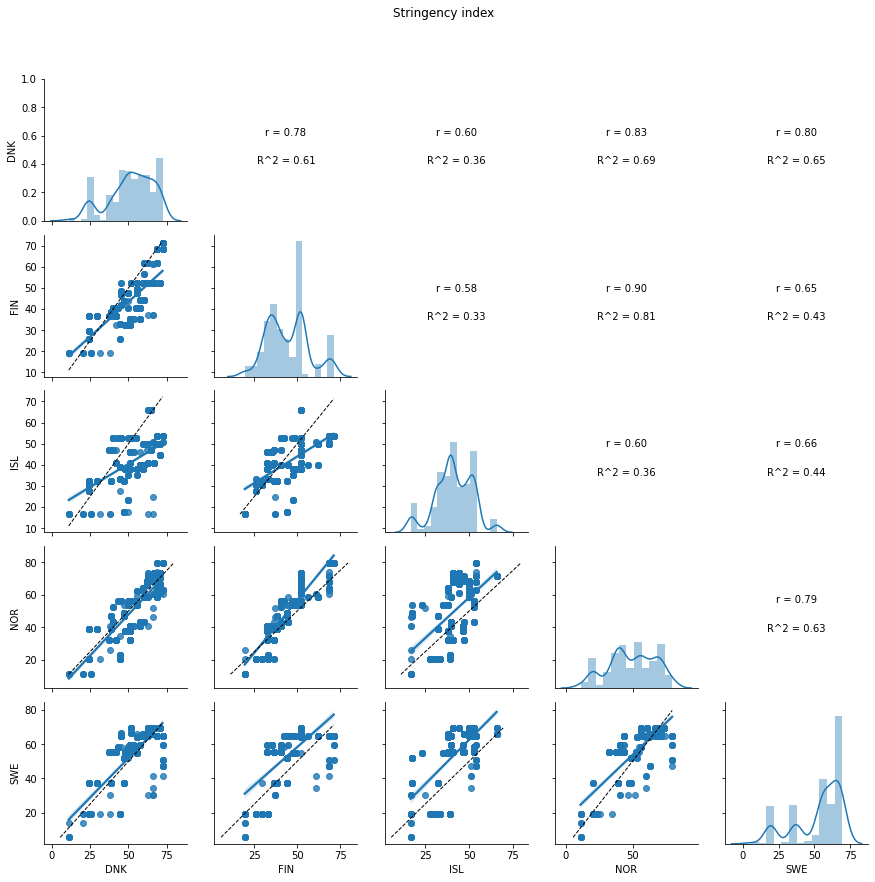

In [13]:
# Figure 6, correlation stringency index

df_stringency = nordics_df[["iso_code", "date", "stringency_index"]]
df_stringency = df_stringency.pivot(index = "date", columns = "iso_code", values = "stringency_index")
df_stringency_dropped = df_stringency.dropna()

g = sns.PairGrid(df_stringency_dropped)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
g.map_lower(plot_unity)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Stringency index')

plt.savefig('./output/fig_6.pdf')

## Figure 6. Correlations of the country stringency index. Linear regressions are shown in blue and a 1:1 regression is shown as black dotted line. The coefficient of determination are shown in the top half of the plot, indicating how well the line fits the data

The stringency index between countries tend to correlate well (Fig. 6), which was also seen in Fig. 1.

In [14]:
# Google trends
# import data
df_vacc_dnk = pd.read_csv("./data/dnk_vaccine.csv", skiprows = 2, parse_dates=["Vecka"])
df_vacc_dnk = df_vacc_dnk.rename(columns={df_vacc_dnk.columns[1]: "DNK", "Vecka": "date"})

df_vacc_swe = pd.read_csv("./data/swe_vaccine.csv", skiprows = 2, parse_dates=["Vecka"])
df_vacc_swe = df_vacc_swe.rename(columns={df_vacc_swe.columns[1]: "SWE", "Vecka": "date"})

df_vacc_fin = pd.read_csv("./data/fin_vaccine.csv", skiprows = 2, parse_dates=["Vecka"])
df_vacc_fin = df_vacc_fin.rename(columns={df_vacc_fin.columns[1]: "FIN", "Vecka": "date"})

df_vacc_isl = pd.read_csv("./data/isl_vaccine.csv", skiprows = 2, parse_dates=["Vecka"])
df_vacc_isl = df_vacc_isl.rename(columns={df_vacc_isl.columns[1]: "ISL", "Vecka": "date"})

df_vacc_nor = pd.read_csv("./data/nor_vaccine.csv", skiprows = 2, parse_dates=["Vecka"])
df_vacc_nor = df_vacc_nor.rename(columns={df_vacc_nor.columns[1]: "NOR", "Vecka": "date"})


dfs_vacc = [df_vacc_dnk,df_vacc_swe,df_vacc_fin,df_vacc_isl,df_vacc_nor]
df_vacc = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs_vacc)

df_vacc_long = pd.melt(df_vacc, id_vars="date", var_name="iso_code", value_name='vaccine_search', col_level=None)

df_vacc_long["iso_code"] = df_vacc_long["iso_code"].astype('category')
df_vacc_long["iso_code"].cat.reorder_categories(['FIN', 'SWE','DNK', 'ISL', 'NOR'], inplace=True)

df_corona_dnk = pd.read_csv("./data/dnk_corona.csv", skiprows = 2, parse_dates=["Vecka"])
df_corona_dnk = df_corona_dnk.rename(columns={df_corona_dnk.columns[1]: "DNK", "Vecka": "date"})

df_corona_swe = pd.read_csv("./data/swe_corona.csv", skiprows = 2, parse_dates=["Vecka"])
df_corona_swe = df_corona_swe.rename(columns={df_corona_swe.columns[1]: "SWE", "Vecka": "date"})

df_corona_fin = pd.read_csv("./data/fin_corona.csv", skiprows = 2, parse_dates=["Vecka"])
df_corona_fin = df_corona_fin.rename(columns={df_corona_fin.columns[1]: "FIN", "Vecka": "date"})

df_corona_isl = pd.read_csv("./data/isl_corona.csv", skiprows = 2, parse_dates=["Vecka"])
df_corona_isl = df_corona_isl.rename(columns={df_corona_isl.columns[1]: "ISL", "Vecka": "date"})

df_corona_nor = pd.read_csv("./data/nor_corona.csv", skiprows = 2, parse_dates=["Vecka"])
df_corona_nor = df_corona_nor.rename(columns={df_corona_nor.columns[1]: "NOR", "Vecka": "date"})

dfs_corona = [df_corona_dnk, df_corona_swe, df_corona_fin, df_corona_isl, df_corona_nor]

df_corona= reduce(lambda left,right: pd.merge(left,right,on='date'), dfs_corona)

df_corona_long = pd.melt(df_corona, id_vars="date", var_name="iso_code", value_name='corona_search', col_level=None)
df_corona_long["corona_search"] = pd.to_numeric(df_corona_long["corona_search"], errors='coerce' )

df_corona_long["iso_code"] = df_corona_long["iso_code"].astype('category')
df_corona_long["iso_code"].cat.reorder_categories(['FIN', 'SWE','DNK', 'ISL', 'NOR'], inplace=True)


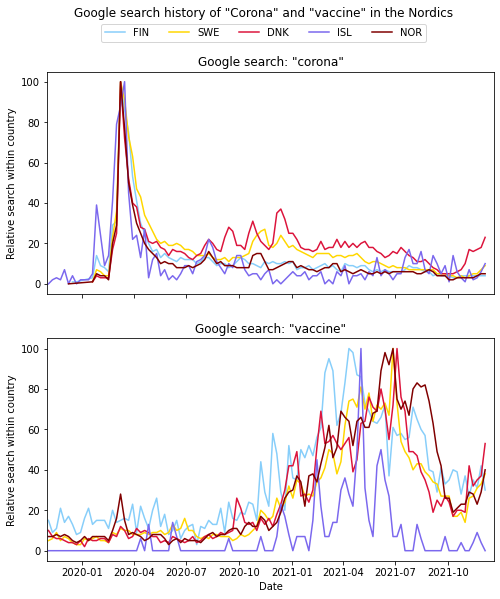

In [15]:
# Figure 7, google trends on "Corona" and "Vaccine
fig7, axes7 = plt.subplots(nrows=2,
                         ncols=1, 
                         figsize=(8,9),
                         sharex=True)
axes7[0].set(xlim = (plot_start_date,plot_end_date))
sns.lineplot(data=df_corona_long, 
             x="date", 
             y="corona_search", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes7[0])

sns.lineplot(data=df_vacc_long, 
             x="date", 
             y="vaccine_search", 
             hue="iso_code",
             palette=plot_colors,
             ax = axes7[1])

axes7[0].set_title('Google search: "corona"')
axes7[1].set_title('Google search: "vaccine"')
axes7[0].set(ylabel='Relative search within country')
axes7[1].set(ylabel='Relative search within country')
axes7[1].set(xlabel='Date')

axes7[0].get_legend().remove()
axes7[1].get_legend().remove()

handles, labels = axes7[0].get_legend_handles_labels()
fig7.legend(handles, labels, loc='center', ncol=5, bbox_to_anchor=(0.5, 0.94))

fig7.suptitle('Google search history of "Corona" and "vaccine" in the Nordics')

plt.savefig('./output/fig_7.pdf')

## Figure 7. Google search trends of "corona" and "vaccine" in the Nordics

Google search trends of "corona" and "vaccine" were investigated. The data was downloaded from google trends. Each country was investigated relative to itself in a scale from 0 to 100, where 100 means the highest amounts of searches in the analysed timespan (Fig. 7). 

People in all countries were searching on "corona" a lot in early 2020 and Denmark seems to search for "corona" relative to itself quite a lot afterwards too.

The word "vaccine" was searched a lot in the beginning of 2021, which is also when the first vaccine shots were administred in these countries.